In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Datasets

/content/drive/MyDrive/Datasets


# Librerias

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

# Datos

In [ ]:
train_data=pd.read_csv('mobile_price.csv')
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Preprocesamiento

In [ ]:
train_data_f = train_data[train_data['sc_w'] != 0]
train_data_f.shape

(1820, 21)

In [ ]:
X=train_data_f.drop(['price_range'], axis=1)
y=train_data_f['price_range']

In [ ]:
#train test split of data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

# Modelo

In [ ]:
#building the model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                           criterion='entropy',
                           max_depth= 10,
                           min_samples_split= 5,
                           n_estimators= 200,
                           random_state=0)

In [ ]:
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_valid)

Random Forest Classifier Accuracy Score:  0.9120879120879121
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        95
           1       0.89      0.85      0.87        92
           2       0.85      0.87      0.86        86
           3       0.96      0.96      0.96        91

    accuracy                           0.91       364
   macro avg       0.91      0.91      0.91       364
weighted avg       0.91      0.91      0.91       364



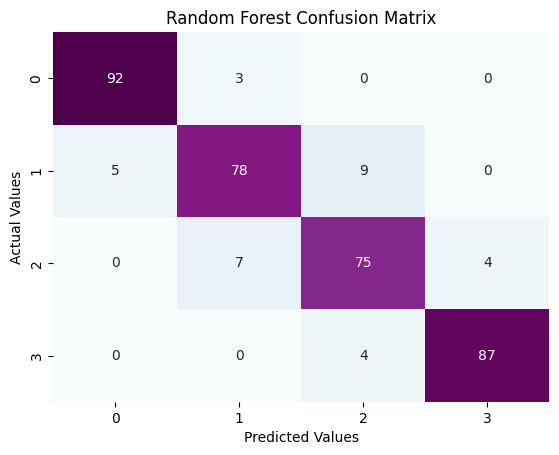

In [ ]:
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_valid,y_pred_rfc))
cm_rfc=my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest Confusion Matrix')

# Guardar el modelo usando joblib

In [ ]:
from joblib import dump

In [ ]:
dump(rfc, 'model1_rfc.joblib')

['model1_rfc.joblib']

# Guardar el modelo usando pickle

In [ ]:
import pickle

In [ ]:
# Save the model
with open('model1_rfc.pkl', 'wb') as f:
    pickle.dump(rfc, f)


# Comparación

1. **Eficiencia en tiempo de carga y guardado:**

* **Joblib**: Es generalmente más eficiente que Pickle en términos de tiempo de carga y guardado, especialmente para objetos grandes como modelos de machine learning y grandes matrices numpy. Joblib está diseñado para ser más eficiente en la serialización de grandes objetos numpy.
* **Pickle**: Puede ser más lento que Joblib para cargar y guardar objetos grandes, ya que no está optimizado específicamente para este propósito.


2. **Tamaño del archivo:**

* **Joblib:** Los archivos generados por Joblib pueden ser más grandes que los de Pickle en algunos casos, pero esto depende del tipo de datos que se están serializando. Joblib puede comprimir los datos, lo que puede resultar en archivos más pequeños si se habilita la compresión.
Pickle: Los archivos generados por Pickle pueden ser más pequeños o más grandes dependiendo de la estructura de los datos y si se usa o no compresión.

3. **Compatibilidad:**

* **Joblib:** Está optimizado para objetos específicos de Python, como grandes arrays de numpy y modelos de scikit-learn, y puede no ser tan general como Pickle.
* **Pickle:** Es una herramienta más general para la serialización y puede manejar una mayor variedad de objetos Python.

4. **Simplicidad:**

* **Pickle:** Es parte de la biblioteca estándar de Python, por lo que no requiere instalación adicional.
* **Joblib:** Necesita ser instalada por separado (pip install joblib), pero es muy simple de usar y específicamente optimizada para machine learning.